<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf

## Creating new data to view it

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

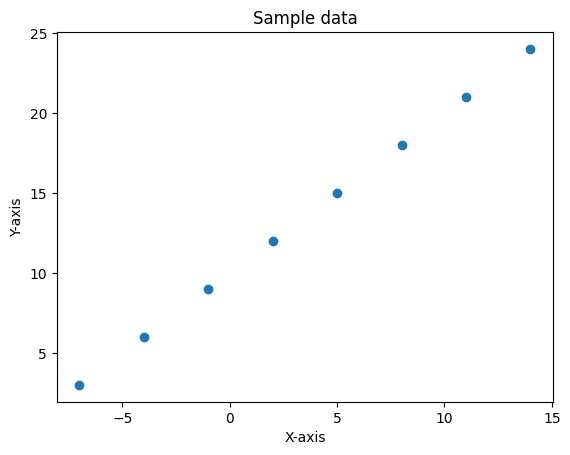

In [3]:
plt.scatter(X,y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample data")
plt.show()

In [4]:
y == X + 10 # from this we can tell that the equation of the line would be y = X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# our input and output shapes are going to be 1
X[0].shape, y[0].shape # its showing nothing cause when we are accesing 1 value from an array it returns a scalar.

((), ())

In [6]:
X[0].ndim # this shows that it is a scalar

0

In [7]:
# turning the numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in creating a model in tensorflow
1. **Creating the model** - defining the input, output layers and alos the hidden layers.
2. **Compiling the model** - defining the loss function that will correct out model, choosing the optimzer that tells our model how to improve the patterns it is learning and evaluation metrics thats tells us the performance of our model.
3. **Fitting the model** - Letting the model find patterns in X and y which are our features and labels.

In [48]:
X.ndim, tf.expand_dims(X, axis=-1).ndim

(1, 2)

In [28]:
x_new = tf.expand_dims(X, axis=-1)
x_new[1,0]

<tf.Tensor: shape=(), dtype=float64, numpy=-4.0>

In [49]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=(1,))
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model.fit(X,y,epochs=5) # since i have provided the input size i do not need to change the tensor to 2 dimensions

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - loss: 15.6170 - mae: 15.6170
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 15.3358 - mae: 15.3358
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 15.0545 - mae: 15.0545
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 14.8376 - mae: 14.8376
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 14.7051 - mae: 14.7051


In [45]:
# predicting using a sample value
chumma = tf.constant([[17.0]]) # make sure the input is always a tensor
model.predict(chumma) # this is when the epochs is 5, has a MAE of 7.4738

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[29.220205]], dtype=float32)

# Improving the Model
Places to improve the model -
1. **Creating a model**- in this step in order to improve our model we may increase the **number of hidden layers**, we may **increase the number of neurons per layer** or change our **activation function** (in this case its linear by default).
2.**Compiling the model** - here we might the change the optmization function or the **learning rate**.
3. **Fitting a model** - here we might increase the number of **epochs** or give the model more **data**.

In [51]:
# Improving the model only by increasing the epoch number

In [50]:
# set random seed
tf.random.set_seed(42)

# 1. creating the model using the sequential API
model_improved = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_improved.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.fit the model
model_improved.fit(tf.expand_dims(X, axis=-1),y,epochs=1000) # Since i have not proved the input shape,
# i will have to convert my 1 dimensional tensor to 2 dimensions

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step - loss: 11.1575 - mae: 11.1575
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 11.0250 - mae: 11.0250
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - loss: 10.8925 - mae: 10.8925
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 10.7600 - mae: 10.7600
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.6275 - mae: 10.6275
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10.4950 - mae: 10.4950
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.3625 - mae: 10.3625
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.2300 - mae: 10.2300
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10.0975 - mae: 10.0975
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 9.9650 - mae: 9.9650
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 9.8325 - mae: 9.8325
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 9.7000 - mae: 9.7000
Epoch 13/1000


In [43]:
chumma = tf.constant([[17.0]])
model_improved.predict(chumma) # this is when the epochs was 1,000, has a MAE of 1.852

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[28.16446]], dtype=float32)

# Larger model for Regression NN